# 本周内容的概括：
 - 有监督的学习
 - 

# 1. 决策树


例子：
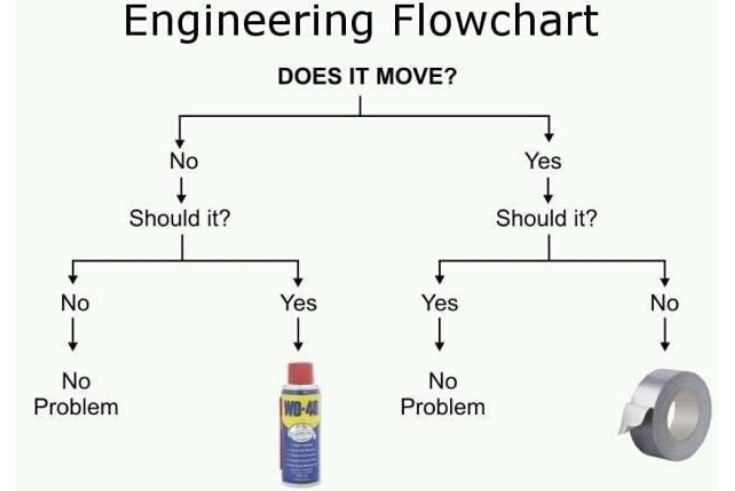

> 实质：
> 
> - 决策树的实质就是在不同的时候问不同的问题
> 
> - 也算是一种特殊的表，即node的结合

> 特点：
>
> - 作为树，其每个节点都只有一个输入edge
>
> - 每个节点代表一次check
>
> - 每次check都是对label的一次检查
>
> - 叶子节点就代表一个结果

> 怎么用肉眼构建决策树？
>
> - 他没有提供统一的方法论，我的总结：
> - 挨个看所有标签，看标签能不能把数据分成一组纯的一组杂的，直到两组都是纯的为止

> 如何提升泛化能力？
> - 节点数量越少越好 

> 如何建构决策树？
>
> - 目标：用训练数据找到一个尽可能小的树
>
> - 指导思想：把“分类效果最显著”的点放在靠近根的位置。

> 怎么衡量分类效果的高低？
>
> - 香农熵
>
> $\begin{equation} H(X) = -\sum\limits_{X}p(x)log(p(x)) \end{equation}$
>
> - 香农熵对于二元分类问题，可以简化为：
> $\begin{equation}B(q)=-(q log_{2}q+(1-q)log_{2}(1-q))\end{equation}$
>
> 如果数据集对于你的终极目标问题有`p`个pos数据，`n`个nega数据，那你的分类终极目标所需要的总熵为：
> $H(Goal) = B(\frac{p}{p+n})$
>
> 每个问题都会提供$H(goal)$的一部分，这就引出了information gain的问题：

In [7]:
import math

def B(q): # q = p/(p+n)
    return -(q*math.log2(q)+(1-q)*math.log2(1-q))

print(B(0.5))

1.0


> information gain:
>
> - 一个问题`A`把数据集分成d个组，每个组有两部分：$p_k$个pos点和$n_k$个neg点。 此处的p和n都是对于终极问题的p和n
> - 那在经过问题`A`之后，剩余（Remainder）的熵为：
> $\begin{equation}\begin{align} Remainder(A) &= \sum\limits^{d}_{k=1}\frac{p_k+n_k}{p+n}B\left(\frac{p_k}{p_k+n_k}\right)\\
&= \sum\limits^{对中间问题分出来的所有组：} \frac{分到这组里的数据数}{进入这个问题前的总数据数}B\left(\frac{终极问题的p}{分进这组的所有}\right)
 \end{align}\end{equation}$
>
> 
>
> - 那gain怎么算呢？
> $\begin{equation} Gain(A)=B\left(\frac{p}{p+n}\right)-Remainder(A) \end{equation}$

> 计算例子：
>
> - 我的终极问题会把数据平分，也就意味着目标是$B(0.5)=1 bit$
>
> - 现在来了一个中间问题，他把`8`个数据点分成两组：
> 
>     - 对中间问题`positive`的：2个终极n
>     - 对中间问题`negative`的：2个终级n，四个终极p
>
>     - 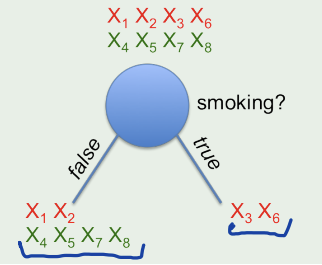
>
> 根据上述公式计算：
>  $Remainder = \frac{2}{8}B(1)+\frac{6}{8}B\left(\frac{2}{6}\right)\approx0.689 bits$
>
>  - $\frac{2}{8}$：经过此中间问题之后，其中一组(右)内含`8`个数据点中的`2`个
>  - $B(1)$: 这个两人的组里全都是终极p，$\frac{2}{2+0}=1$
>  - $\frac{6}{8}$: 此中间问题分出的第二组(左)中含`8`个数据点里的`6`个
>  - $B(\frac{2}{6})$: $\frac{2个终极p（红色）}{组内总数6个}$
>
> 那么，$Gain(此问题) = 1-0.689=0.311 bits$
> 

> 具体算法流程我就不看了，万一要看就参照Week16 DecisionTree P23/36吧，OneNote里也有更详细的解释

> 由于其高可解释性，决策树在医学领域很常用 

> 修剪决策树：
>
>  - 修剪决策树可以提升决策树的泛化能力
>  - 修剪：保留这个节点，但是抹掉节点下属的一切
>  - 核心思想：如果不分类造成的误分类误差比分类造成的误分类误差小，那还不如不分类
>  - 如何操作：
>  1. 计算节点的`mcp`
>       - mcp计算公式：
>       - $\begin{equation} mcp = \frac{k-c+1}{k+2} \end{equation}$
>           - k:进入此节点的总数据数
>           - c: 经过此节点问题后，被分出来的大头部分的数据个数
>           - 例如：一个节点收到`6`个数据，根据此节点的分类问题，将其分为两组:`4`和`2`，则其$mcp = \frac{6-4+1}{6+2}$
>  2. 计算节点的`backup error`
>       - $backup error = \sum 子节点可能性*子节点error$
>       - 子节点可能性就是这个子节点占父节点中所有数据点的个数
>  3. 计算`error`
>       - $error = min(backup error, mcp)$
>       - 对于叶子节点，其error为其mcp。
>  4. 判断：
>  > 如果一个节点的`backup error`大于其`error`，这个节点就可以修掉

In [17]:
# MCP计算

'''
description: 计算mcp
param {*} k: 一共！一共有多少数据点
param {*} c: 分类后的大头有多少数据点
return {*} mcp值
'''
def mcp(k,c): 
    return(k-c+1)/(k+2)

print(mcp(3,2))

0.4


> 随机决策树森林：
> 对一定数量（`T`棵）的树：
>   - 随机选出`n`个数据（比如说，选出总数据集中的66%）
>   - 对每棵树：
>       - 对每个节点：
>           - 从所有预测器变量中随机选取`m`个
>           - 用表现最好的预测器变量来塞进这个节点里作为分类标准
>           - 选取`m`的标准：
>               - Random Splitter Selection: m=1
>               - Breiman's Bagger：m = 预测器变量总数
>               - Random Forest：m<<预测器变量总数
>
>   - 预测：当一个新的输入被输入到系统中时，它将沿着所有的树运行。结果可能是所有到达的终端节点的平均数或加权平均数，或者，在分类变量的情况下，是投票的多数。
>
>  - 优点：
>       - 快
>       - 可以处理不均衡的以及部分缺失的数据
>  - 缺点：
>       - 用于回归时，无法对超出训练集范围以外的东西进行预测
>       - 可能对有噪声的数据集过拟合
>  - 影响其性能的主要指标：
>       - 最大允许树深度`D`
>       - 随机性的程度和随机的类型
>       - 森林大小（树的数目`T`）
>       - weak learner model 的选择
>       - 训练时使用的objective function
>       - 实际使用时选择的features

# 2. 深度学习


先是废话：关于什么是人的神经元

然后：人工神经元的结构：


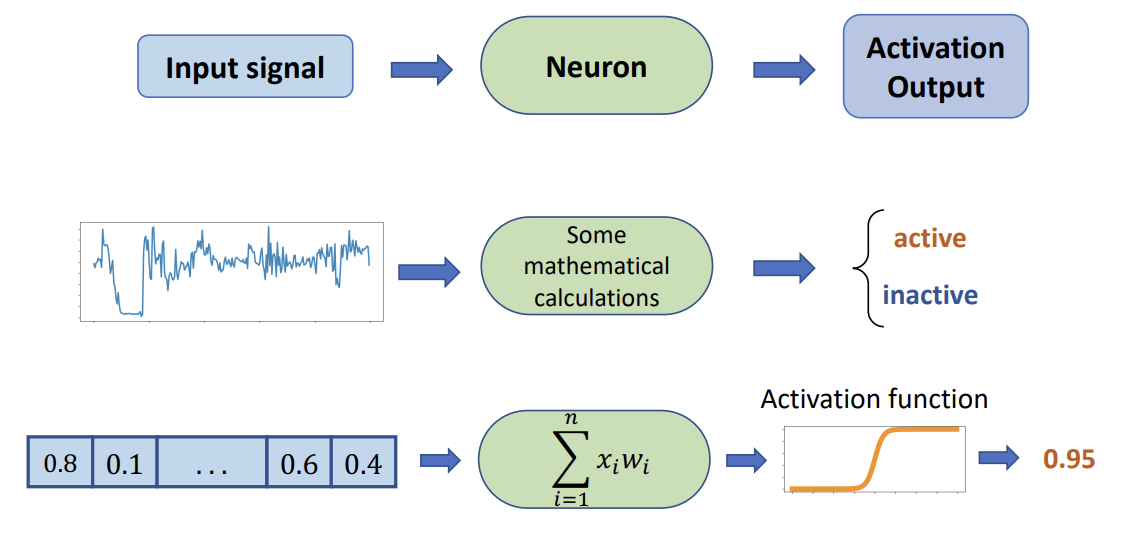

没啥新鲜的，就是输入->*权重+偏置->激活函数

所谓深度学习就是有老么些中间层

> Loss Function:
>  - 衡量网络输出和真值之间差距的其中一种函数
>  - 量化网络输出的好坏，loss越小越好
>  - 交叉熵Loss：最常用的loss之一
>    - 交叉熵衡量目标分布和估计分布的区别
>
> SoftMax:
>   - 将输入的一组一维实数向量归一化
>   - 即，结果的所有值都在0~1，且和为1

> 那，怎么训练呢？
>
> 梯度下降
>
> 1. SGD Stochastic Gradient Descent
>  - 对完整的数据集计算GD太费劲了（计算量太大）
>  - 我们可以使用一个数据点来干梯度下降。这个数据点是随机选出的。
> 2. Mini-Batch Gradient Descent:
>  - 将数据集分成几个小batch，每个小batch含`B`个数据点
>  - 对这个小batch运行梯度下降


> 反向传播
>
> 主要是例子，详见Week16PDF DeeLearning2.PDF P33/50

> 总结：
>
>  - 用当前的参数集（权重）进行预测
>  - 我们会提供关于当前预测好不好的反馈
>  - 会根据我们的反馈更新参数
>  - 用链式法则将loss反向传播到整个网络

# 3. CNN

关于卷积层是什么

> 激活层：
>  - 专门放激活函数的一层。
>  - 常用的激活函数有sigmoi，relu，tanh

> 池化层：
>  - 将输入降采样
>  - 减少网络对特征位置的敏感性
>  - 常见的有平均值池化和最大值池化

> 全连接层：
>  - 将所有输入连接到所有输出
>  - 一般用作网络的最后一层（就在分类之前的位置）

> Dropout：
>  - 在训练过程中随机关闭若干神经元（将其设为0）
>  - 防止过拟合

> Batch-Normalisation 层：
>  - 把输入的小batch标准化
>  - 协助泛化并抗干扰

 




# 略过了最后一个PDF（NeuralNetwork.PDF）, 我估计不会考，想看就参照Week16的OneNote吧，挺详细的了那里

# 4. 作业

作业只关于决策树



## 4.1 基于熵的决策树分类

In [1]:
# 调库
from sklearn import tree
from sklearn.model_selection import train_test_split 

In [2]:
# 准备环境和数据
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt

from sklearn import metrics
from matplotlib.pylab import rcParams
import numpy as np

breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2)

In [4]:
# 练模型

dt = tree.DecisionTreeClassifier(criterion="entropy")

model = dt.fit(Xtr,Ytr)

# 预测：

Ypred_test = model.predict(Xtest)

acc_test = metrics.accuracy_score(Ytest,Ypred_test)

print("Test Accuracy:" + str(acc_test))


Test Accuracy:0.9298245614035088


In [6]:
# 树的简单可视化：

from sklearn.tree import export_text
features=breast_cancer['feature_names'].tolist()
r = export_text(model,feature_names=features) 
print(r)


|--- worst perimeter <= 105.95
|   |--- worst concave points <= 0.14
|   |   |--- worst texture <= 30.15
|   |   |   |--- class: 1
|   |   |--- worst texture >  30.15
|   |   |   |--- worst concave points <= 0.09
|   |   |   |   |--- class: 1
|   |   |   |--- worst concave points >  0.09
|   |   |   |   |--- perimeter error <= 1.65
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- perimeter error >  1.65
|   |   |   |   |   |--- class: 1
|   |--- worst concave points >  0.14
|   |   |--- worst texture <= 25.94
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- worst texture >  25.94
|   |   |   |--- worst symmetry <= 0.27
|   |   |   |   |--- worst concave points <= 0.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- worst concave points >  0.14
|   |   |   |   |   |--- class: 1
|   |   |   |--- worst symmetry >  0.27
|   |   |   |   |--- class: 0
|--- worst perimeter 

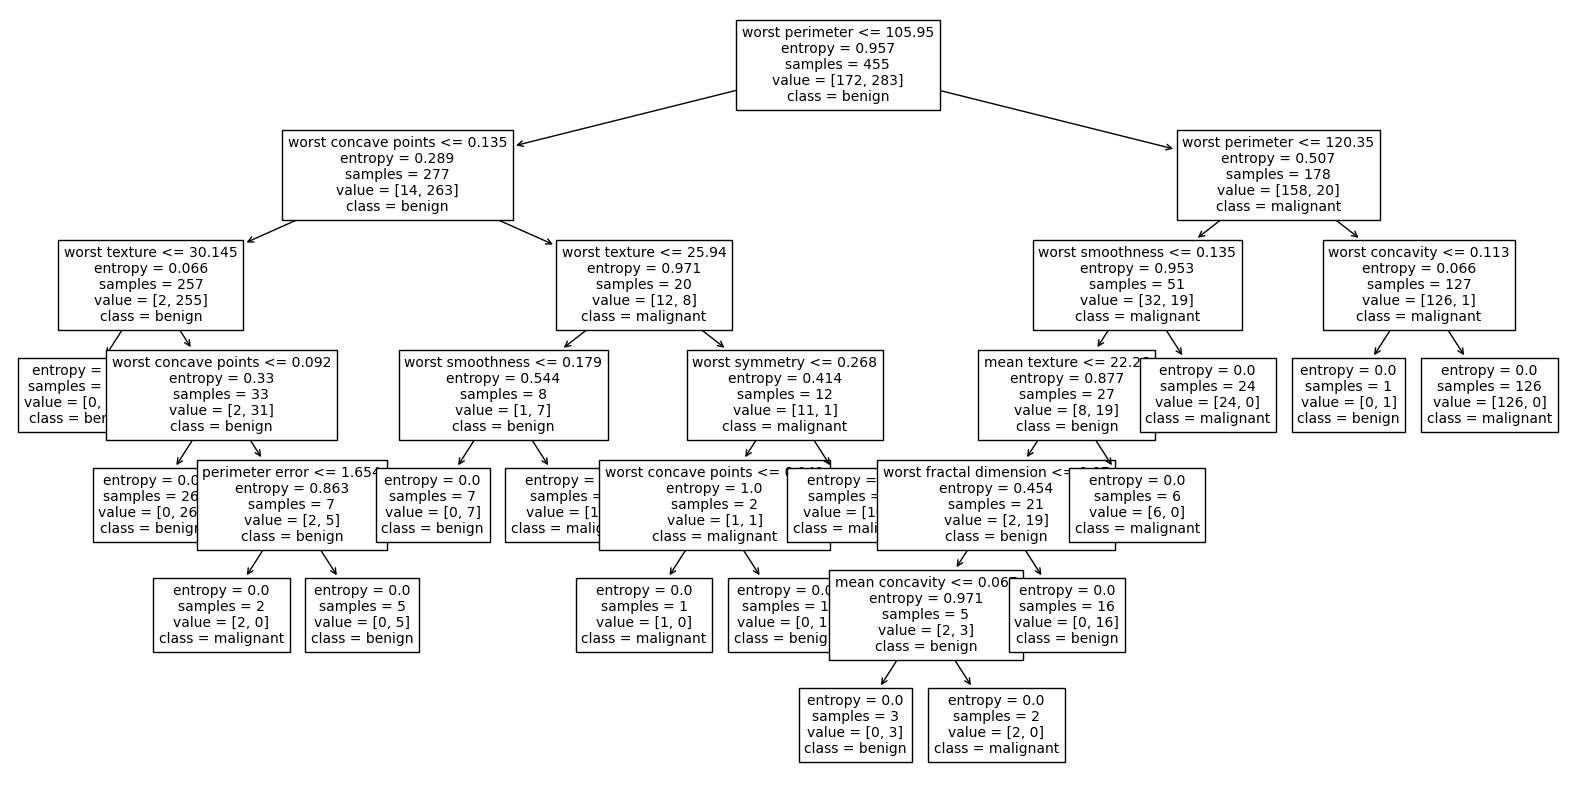

In [7]:
# 另一种可视化：
rcParams['figure.figsize'] = [20, 10]
classes=breast_cancer.target_names 
tree.plot_tree(model,feature_names=features,class_names=classes,fontsize=10)
plt.show()

## 4.2 基于Gini Impurity的决策树

> Gini Impurity 可以作为另一个选择节点问题的参考
>
>  - 如果有`k`类：
>  - 对于一个给定分支`B`:
>  - class `i` 的比例是$p_i$:
>  - 则 Gini Impurity计算如下：
>
> $$ G(B) = 1 - \sum_{i=1}^k p_i^2 $$

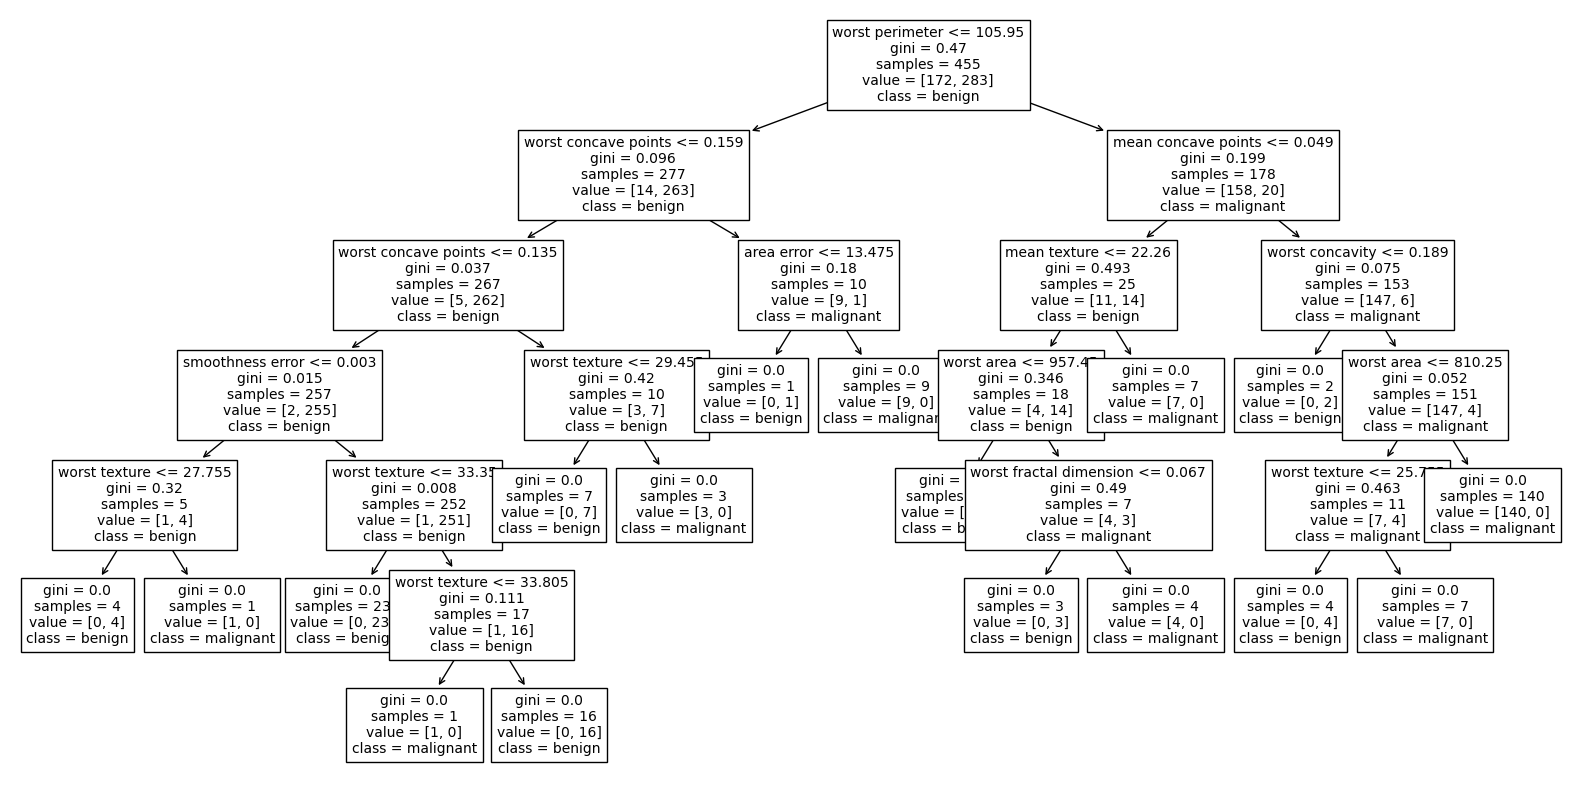

In [8]:
# 调库

dt1 = tree.DecisionTreeClassifier(criterion="gini")

model1 = dt1.fit(Xtr, Ytr)

plt.figure()

tree.plot_tree(model1, feature_names=features,
               class_names=classes, fontsize=10)

plt.show()

# 4.3 对树进行限制

> 有很多关于树的参数可以修改，这种限制和修改最后会导致过拟合/欠拟合
>
> 譬如说，下述的最大深度`max_depth`：

In [9]:
# 限制最大深度为2：
dt2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2) 
model2=dt2.fit(Xtr, Ytr)

Ypredtr=model2.predict(Xtr) 
Ypredtest=model2.predict(Xtest)

accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

training accuracy=0.9340659340659341, test accuracy=0.868421052631579


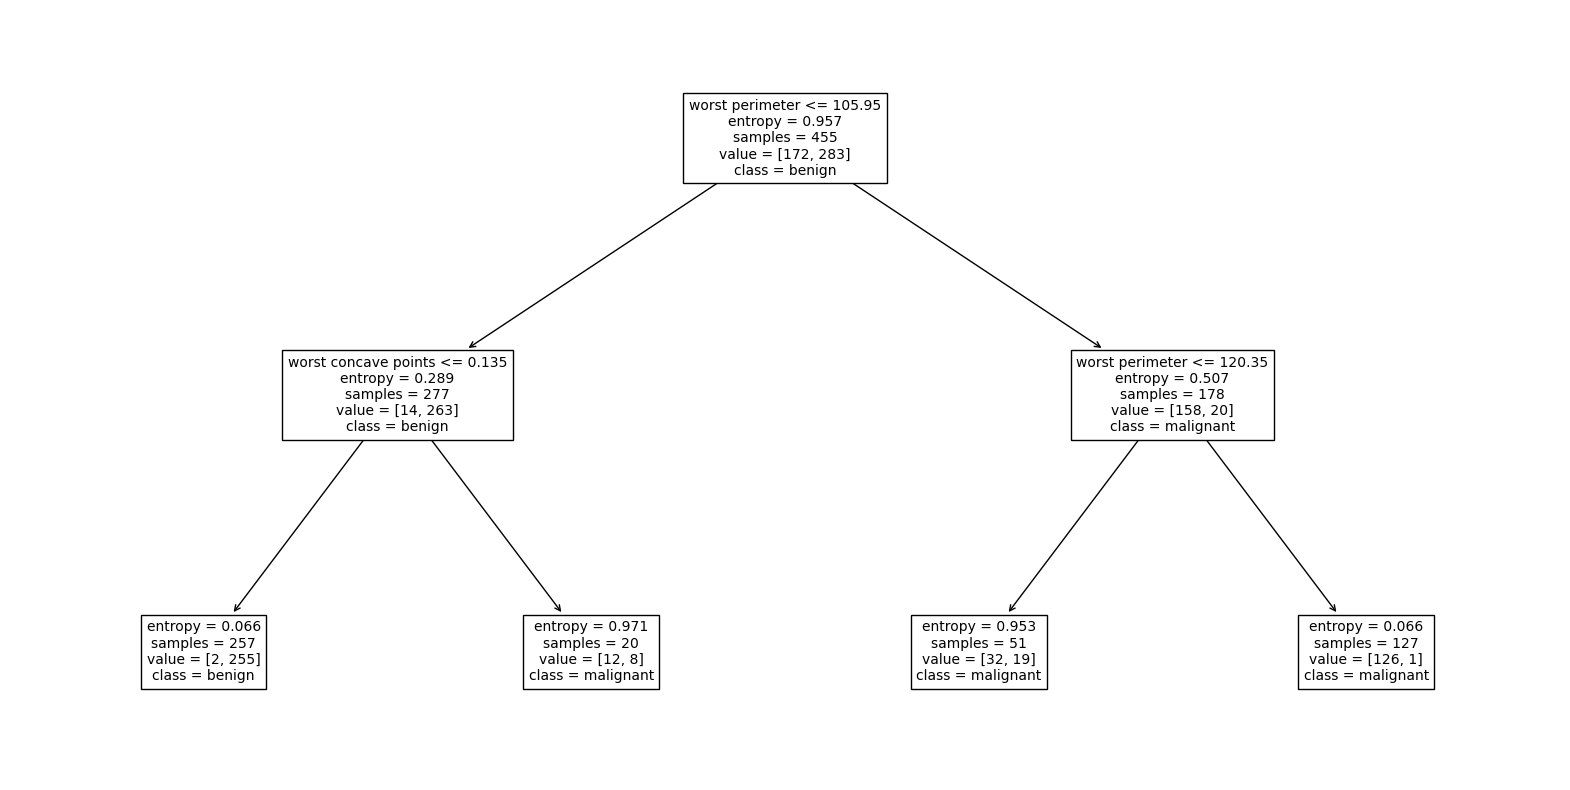

In [11]:
 # 可视化一下，瞧瞧：
plt.figure() 
tree.plot_tree(model2,feature_names=features,class_names=classes,fontsize=10)
plt.show()

> 另一种方法就是限制叶子节点的数目
>
> 在此种情形下，树的生长就是用一种最优者优先的方式，

training accuracy=0.9582417582417583, test accuracy=0.9210526315789473


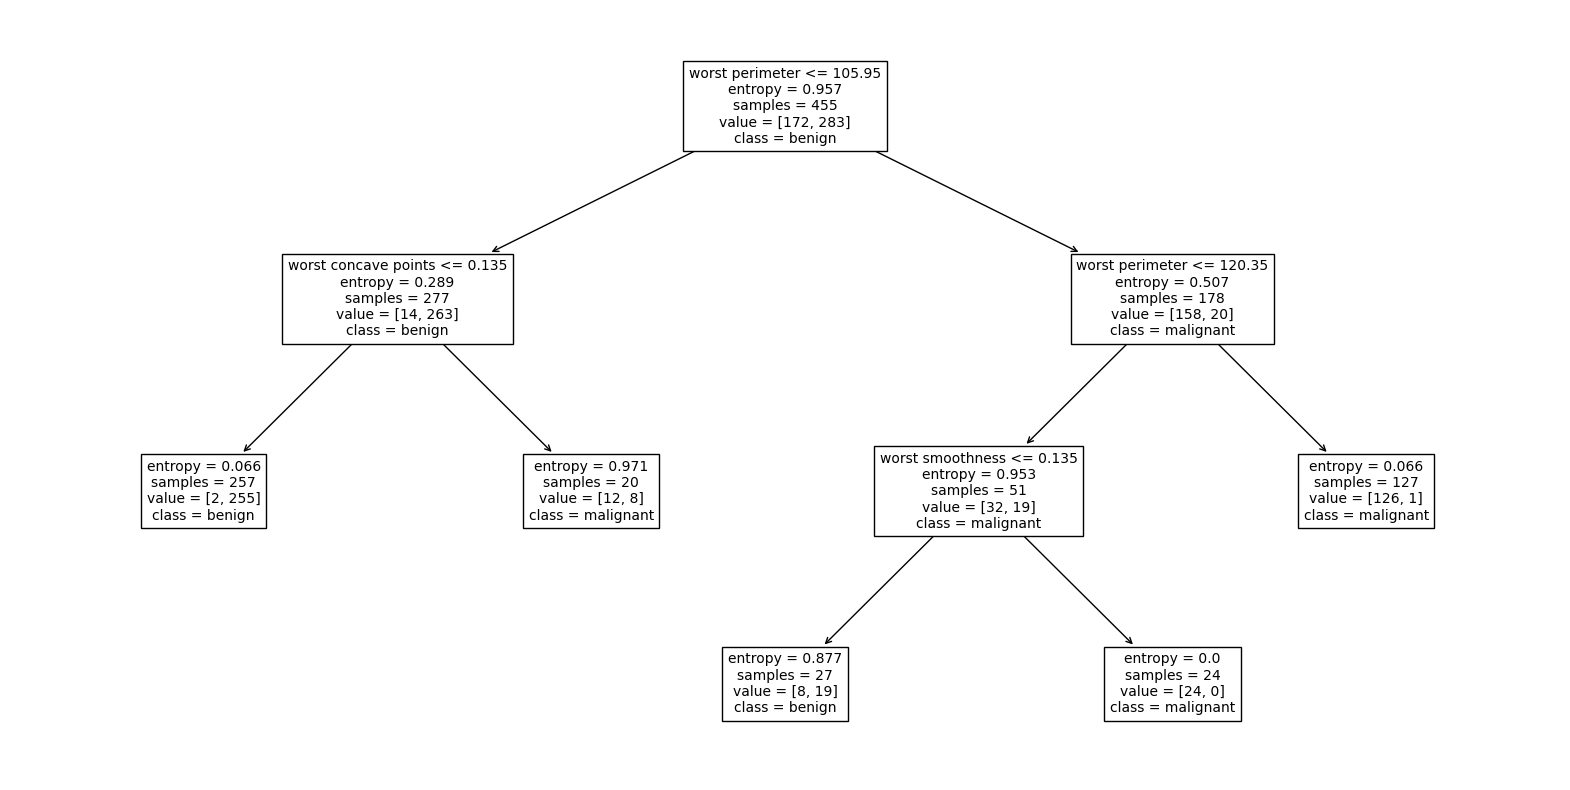

In [13]:
# 将叶子节点数量限制为5个：
dt3=tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5) 
model3=dt3.fit(Xtr, Ytr)

Ypredtr=model3.predict(Xtr) 
Ypredtest=model3.predict(Xtest)

accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

plt.figure() 
tree.plot_tree(model3,feature_names=features,class_names=classes,fontsize=10)
plt.show()

> 在impurity reduction里设一个阈值：只有分类能产生的impurity能高于这个阈值，才采用这个分类节点

training accuracy=0.967032967032967, test accuracy=0.9122807017543859


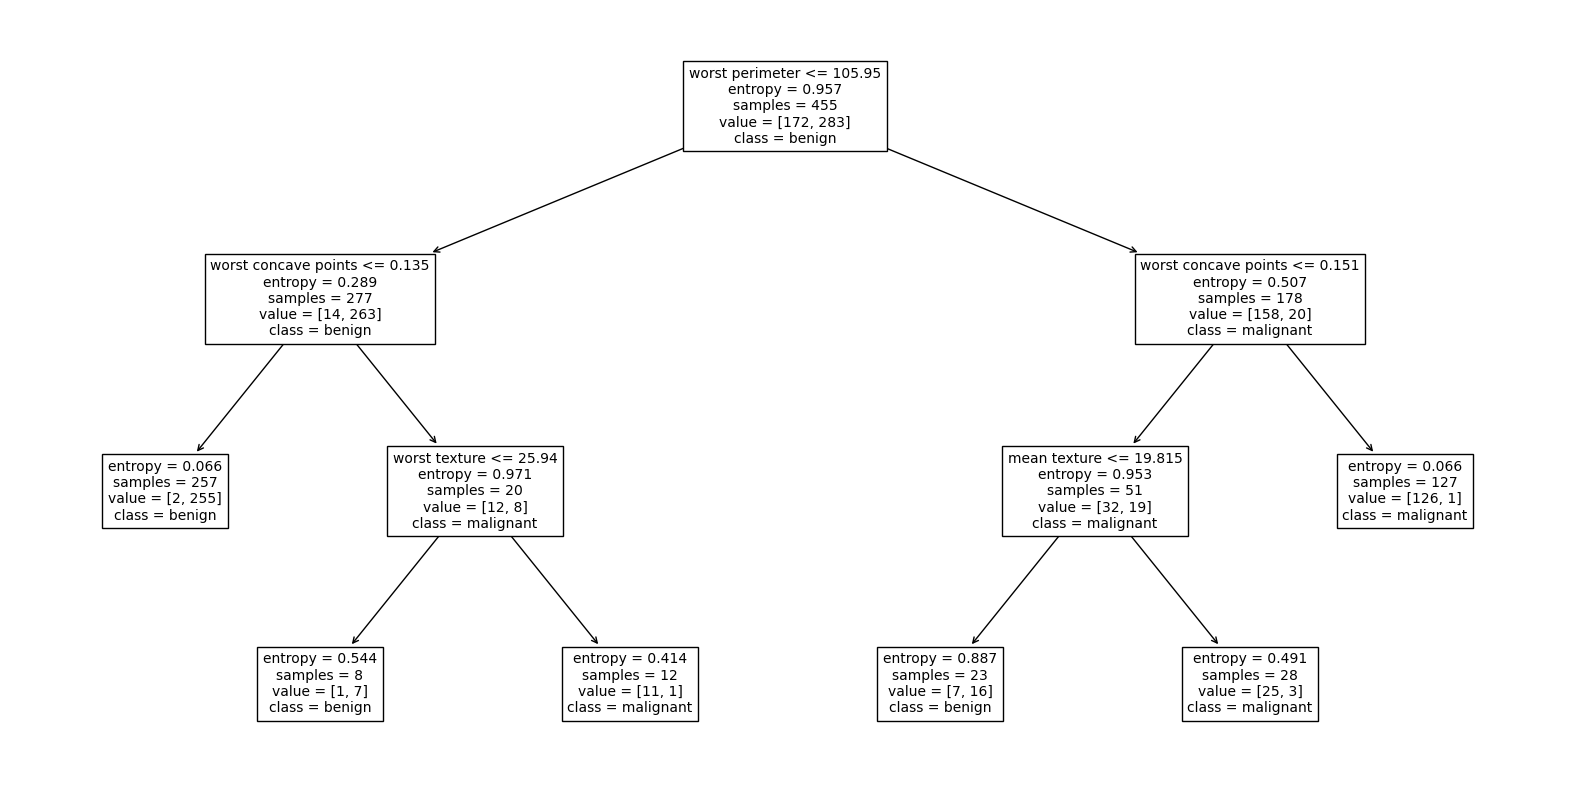

In [15]:
# impurity reduction设阈值：
dt4=tree.DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.02) 
model4=dt4.fit(Xtr, Ytr)
Ypredtr=model4.predict(Xtr) 
Ypredtest=model4.predict(Xtest)
accuracytr=metrics.accuracy_score(Ytr,Ypredtr) 
accuracytest=metrics.accuracy_score(Ytest,Ypredtest)
print(f'training accuracy={accuracytr}, test accuracy={accuracytest}')

plt.figure() 
tree.plot_tree(model4,feature_names=features,class_names=classes,fontsize=10)
plt.show()

## 4.4 将决策树用于回归：

> 在此种应用环境下，每个叶子节点都代表一个实数值
>
> 节点的分别不是基于impurity reduction, 而是基于对总MSE的减少

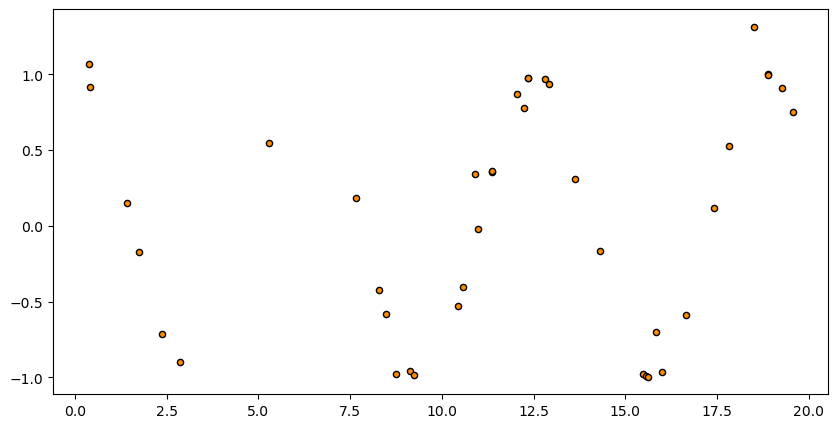

In [16]:
# 生成数据集：
np.random.seed(0)
X = np.sort(20 * np.random.rand(40, 1), axis=0) 
y = np.cos(X).ravel()
y[::5] += 0.5 - np.random.rand(8)

rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.show()

In [26]:
# 调库

from sklearn.tree import DecisionTreeRegressor

rt = DecisionTreeRegressor(max_depth=2)

In [27]:
# 练
model = rt.fit(X,y)

ypred = model.predict(X)

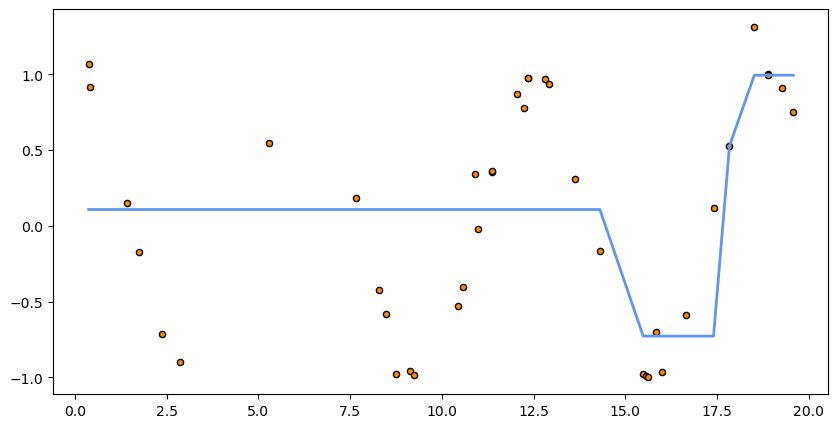

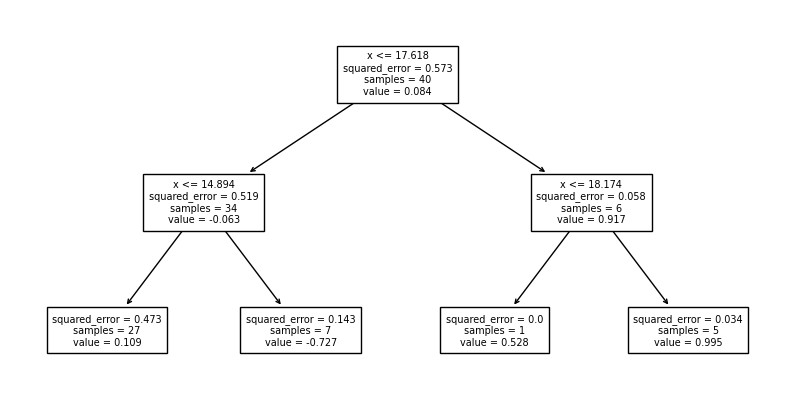

In [28]:
# 可视化
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.plot(X, ypred, color="cornflowerblue",label="max_depth=2",
   linewidth=2)
plt.show()
plt.figure() 
tree.plot_tree(model,feature_names=['x','y'],fontsize=7)
plt.show()

 也可以用这一手给糖尿病数据做一个回归树。

In [29]:
# 调库：性能参数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_diabetes

In [31]:
# 准备数据
diabetes = load_diabetes()

diabetes_X=diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train, diabetes_X_test, \
    diabetes_Y_train, diabetes_Y_test= train_test_split(diabetes_X, diabetes_Y, test_size=0.2,random_state=0)

In [32]:
# 练

rtdb = DecisionTreeRegressor(max_depth=5)
modeldb=rtdb.fit(diabetes_X_train, diabetes_Y_train) 


diabetes_Y_pred_train = modeldb.predict(diabetes_X_train)
diabetes_Y_pred = modeldb.predict(diabetes_X_test)


print(f"mean squared error test={mean_squared_error(diabetes_Y_pred,diabetes_Y_test)}")
print(f"mean squared error training={mean_squared_error(diabetes_Y_pred_train,diabetes_Y_train)}")
features=diabetes['feature_names']

mean squared error test=4805.551555586217
mean squared error training=1832.5242867398824


我们把预测值和真值作为两个轴，把数据打印出来，看看有多接近45°的线：

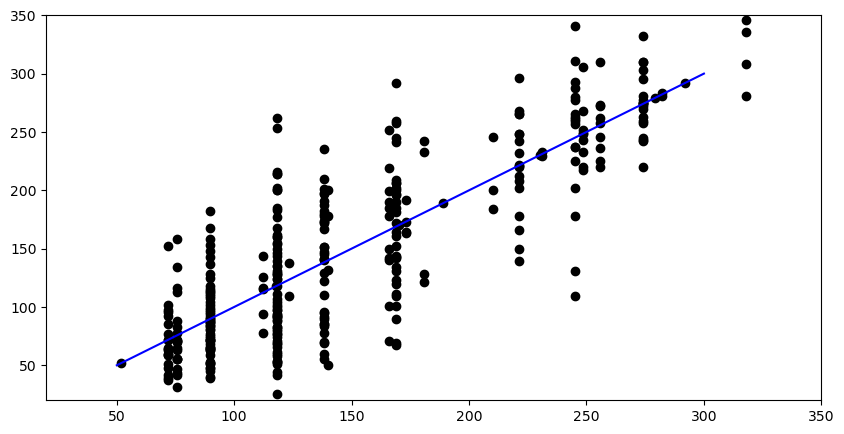

In [33]:
plt.figure()
plt.scatter(diabetes_Y_pred_train,diabetes_Y_train,color='black') 
x = np.linspace(50,300,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20, 350)
plt.xlim(20, 350)
plt.show()